In [1]:
import pandas as pd
data = pd.read_csv('image_bins.csv')

In [2]:
data.head()

,Unnamed: 0,35,85,125,165,205,245,class
0,0,8712.721443,3279.095153,16609.232351,71357.832693,56542.240014,3498.878345,BAS
1,1,10747.458681,4015.895393,11889.039690,45974.309823,63587.564327,23785.732086,BAS
2,2,2777.049171,8282.663493,12155.791222,35649.788854,95532.832343,5601.874917,BAS
3,3,12192.918311,4948.432880,28852.074195,35786.930334,74423.850548,3795.793732,BAS
4,4,7643.250093,7024.395848,33038.923821,36694.977726,68038.729434,7559.723079,BAS


In [3]:
data.keys()

Index(['Unnamed: 0', '35', '85', '125', '165', '205', '245', 'class'], dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
image_labels = gle.fit_transform(data['class'])
label_mappings = { index:label for index, label in enumerate(gle.classes_) }
label_mappings

{0: 'BAS',
 1: 'EBO',
 2: 'EOS',
 3: 'KSC',
 4: 'LYA',
 5: 'LYT',
 6: 'MMZ',
 7: 'MOB',
 8: 'MON',
 9: 'MYB',
 10: 'MYO',
 11: 'NGB',
 12: 'NGS',
 13: 'PMB',
 14: 'PMO'}

In [5]:
data['class'] = image_labels
data.head()

,Unnamed: 0,35,85,125,165,205,245,class
0,0,8712.721443,3279.095153,16609.232351,71357.832693,56542.240014,3498.878345,0
1,1,10747.458681,4015.895393,11889.039690,45974.309823,63587.564327,23785.732086,0
2,2,2777.049171,8282.663493,12155.791222,35649.788854,95532.832343,5601.874917,0
3,3,12192.918311,4948.432880,28852.074195,35786.930334,74423.850548,3795.793732,0
4,4,7643.250093,7024.395848,33038.923821,36694.977726,68038.729434,7559.723079,0


In [6]:
data.drop(columns =['Unnamed: 0'], inplace=True)

In [7]:
data['class'].value_counts()

12    8484
5     3937
10    3268
8     1789
2      424
11     109
0       79
1       78
14      70
9       42
7       26
13      18
6       15
3       15
4       11
Name: class, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
X = data.drop(columns=['class'])
y = data['class']
weights = {2:4.0, 11:4.0, 0:4.8, 1:4.8, 14:4.8, 9:5.5, 7:6.0, 13:7.1, 6:8.5, 3:8.5, 4:10 }
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=50)
logistic_model = LogisticRegression(random_state=50, class_weight=weights, solver='lbfgs', multi_class='multinomial', max_iter = 1500)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 4.8, 1: 4.8, 2: 4.0, 3: 8.5, 4: 10, 6: 8.5,
                                 7: 6.0, 9: 5.5, 11: 4.0, 13: 7.1, 14: 4.8},
                   max_iter=1500, multi_class='multinomial', random_state=50)

In [30]:
import numpy as np
prediction_length = len(logistic_model.predict_proba(X_train))
prediction_certainty = np.array([ logistic_model.predict_proba(X_train)[x].max() for x in range(prediction_length)])
pred_bool = prediction_certainty > 0.5 
output = np.where(pred_bool)[0]
print('The logistic model predicts a class with greater than 50% certainty for {}, or {}% of the training set' 
      .format(len(output), round(100*(len(output)/prediction_length), 3)))

The logistic model predicts a class with greater than 50% certainty for 8963, or 65.077% of the training set


In [31]:
training_score = logistic_model.score(X_train, y_train)*100
print('The training set got a score of {} %'.format(round(training_score,3)))

The training set got a score of 68.475 %


In [32]:
predictions = logistic_model.predict(X_test)

In [33]:
print("The model achieved an accuracy score of {} %" .format(100*round(logistic_model.score(X_test, y_test), 5)))

The model achieved an accuracy score of 68.57600000000001 %


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      0.13      0.21        15
           2       0.18      0.36      0.24        96
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         5
           5       0.62      0.48      0.54       978
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6
           8       0.54      0.18      0.27       486
           9       0.00      0.00      0.00         7
          10       0.64      0.78      0.70       815
          11       0.00      0.00      0.00        22
          12       0.78      0.91      0.84      2113
          13       0.00      0.00      0.00         7
          14       0.33      0.33      0.33        18

    accuracy                           0.69      4592
   macro avg       0.24      0.21      0.21      4592
weighted avg       0.67   

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

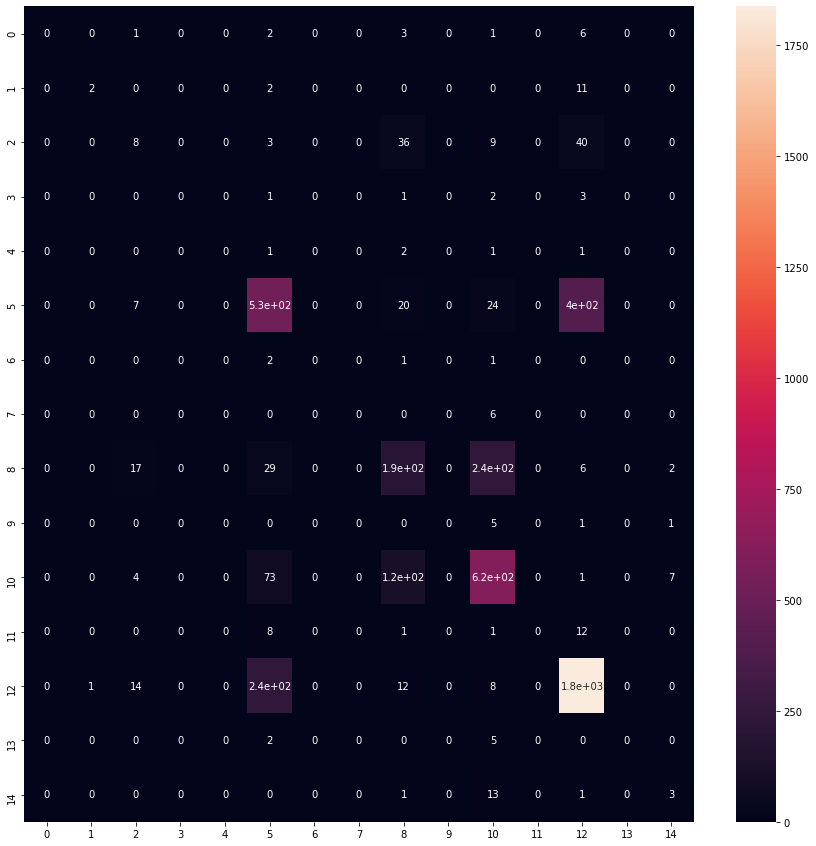

In [17]:
## Based on the results, the logistic model could accurately predict classes [1,5,8,10,12,14]. 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix, annot=True)

In [15]:
## Heatmap looks bad, real bad 

In [22]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
weights = {2:4.0, 11:4.0, 0:4.8, 1:4.8, 14:4.8, 9:5.5, 7:6.0, 13:7.1, 6:8.5, 3:8.5, 4:10 }
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', class_weight=weights))

In [23]:
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight={0: 4.8, 1: 4.8, 2: 4.0, 3: 8.5, 4: 10,
                                   6: 8.5, 7: 6.0, 9: 5.5, 11: 4.0, 13: 7.1,
                                   14: 4.8},
                     kernel='linear'))])

In [25]:
svm_predict = clf.predict(X_test)

<AxesSubplot:>

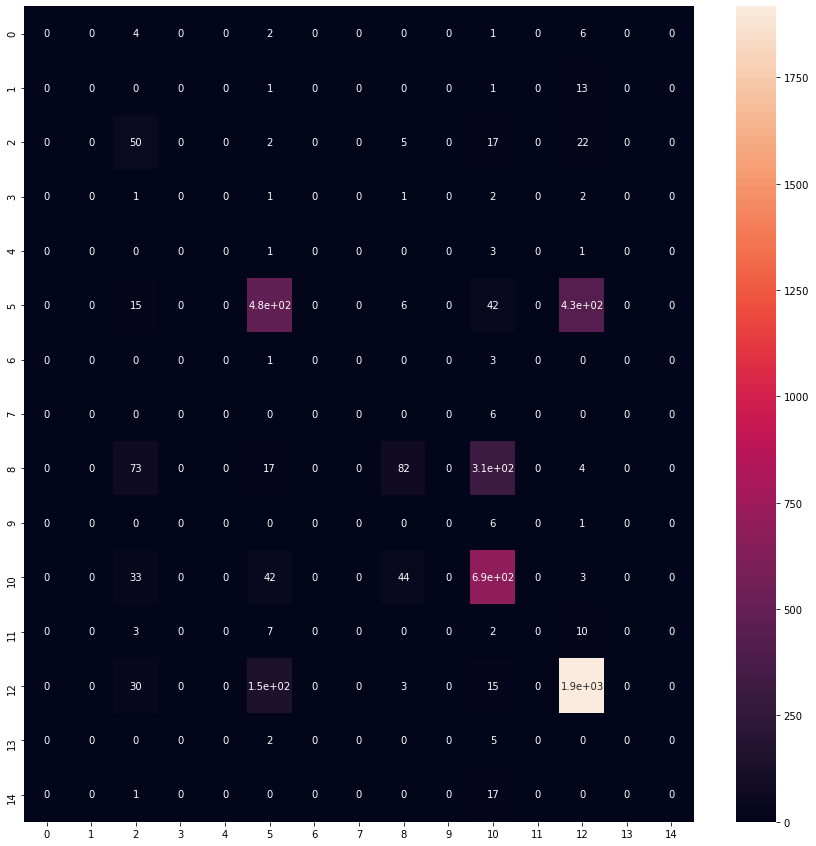

In [26]:
plt.figure(figsize=(15,15))
cf_matrix_2 = confusion_matrix(y_test,svm_predict)
sns.heatmap(cf_matrix_2, annot=True)

In [27]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        15
           2       0.24      0.52      0.33        96
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         5
           5       0.68      0.49      0.57       978
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6
           8       0.58      0.17      0.26       486
           9       0.00      0.00      0.00         7
          10       0.62      0.85      0.72       815
          11       0.00      0.00      0.00        22
          12       0.80      0.91      0.85      2113
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        18

    accuracy                           0.70      4592
   macro avg       0.19      0.20      0.18      4592
weighted avg       0.69   

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## the SVM model produced similar results, which no significant improvents in predicting the minor classes, despite 
## changes made to the weights assigned to the class. Reattemptimpting to apply smote analysis to image features. 

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [37]:
from collections import Counter
print(Counter(y_res))

Counter({12: 6371, 8: 6371, 3: 6371, 10: 6371, 5: 6371, 2: 6371, 0: 6371, 13: 6371, 11: 6371, 1: 6371, 7: 6371, 14: 6371, 9: 6371, 6: 6371, 4: 6371})


In [ ]:
## now we refit the models. 

In [38]:
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', class_weight=weights))

In [39]:
clf.fit(X_res,y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight={0: 4.8, 1: 4.8, 2: 4.0, 3: 8.5, 4: 10,
                                   6: 8.5, 7: 6.0, 9: 5.5, 11: 4.0, 13: 7.1,
                                   14: 4.8},
                     kernel='linear'))])

In [40]:
svm_predict_2 = clf.predict(X_test)

<AxesSubplot:>

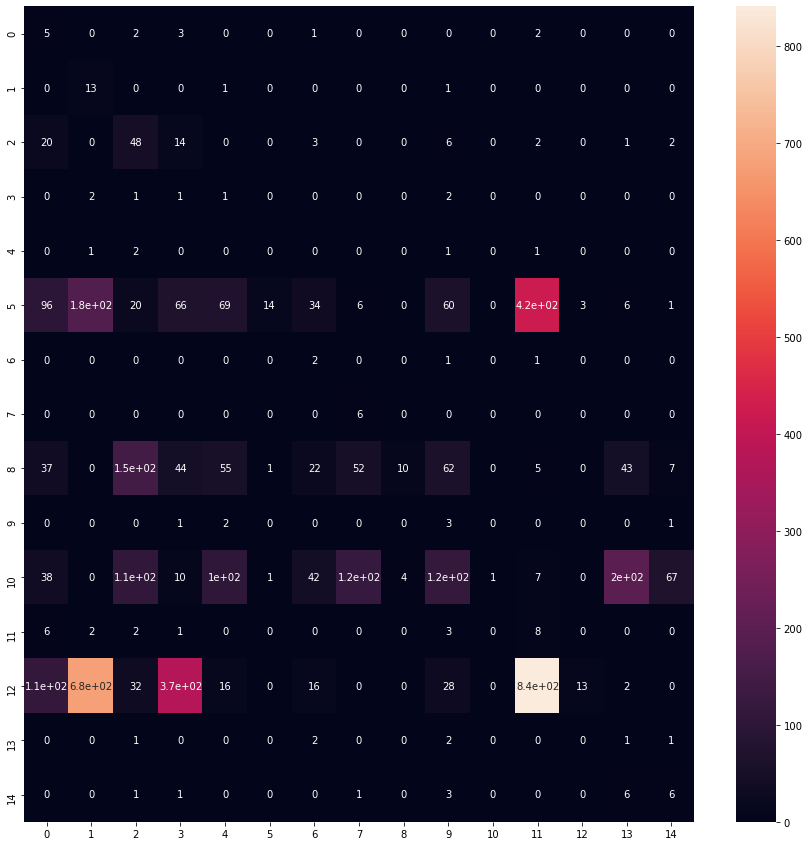

In [41]:
plt.figure(figsize=(15,15))
cf_matrix_2 = confusion_matrix(y_test, svm_predict_2)
sns.heatmap(cf_matrix_2, annot=True)

In [42]:
## SMOTE analysis yielded more predictions, but the accuarcay was greatly diminshed. 
print(classification_report(y_test, svm_predict_2))

              precision    recall  f1-score   support

           0       0.02      0.38      0.03        13
           1       0.01      0.87      0.03        15
           2       0.13      0.50      0.21        96
           3       0.00      0.14      0.00         7
           4       0.00      0.00      0.00         5
           5       0.88      0.01      0.03       978
           6       0.02      0.50      0.03         4
           7       0.03      1.00      0.06         6
           8       0.71      0.02      0.04       486
           9       0.01      0.43      0.02         7
          10       1.00      0.00      0.00       815
          11       0.01      0.36      0.01        22
          12       0.81      0.01      0.01      2113
          13       0.00      0.14      0.01         7
          14       0.07      0.33      0.12        18

    accuracy                           0.03      4592
   macro avg       0.25      0.31      0.04      4592
weighted avg       0.82   

In [44]:
# now attempting to use blob detection to improve feature engineering.
# set parameters for blob detection 
import cv2
params = cv2.SimpleBlobDetector_Params()

# set area parameters for detcting blob size
params.filterByArea = True
params.minArea = 100

# set circularity paramaters for detecting circular blobs  
params.filterByCircularity = True
params.minCircularity = 0.8

# set convexity parameter
params.filterByConvexity = True
params.minConvexity = 0.3

# set inertia paramaeter 
params.filterByInertia = True 
params.minInertiaRatio = 0.02